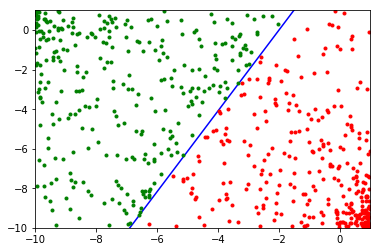

In [112]:
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import random 
import math

def get_k_b(x, y, angle):
    k = math.tan(angle)
    b = y - k * x
    return k, b

def draw_line(x, y, angle, border):
    k = angle
    b = y - k * x
    plt.plot((border[0], border[1]), (border[0] * k + b, border[1] * k + b), 'b')
    
def x_range(border, k, b):
    x1 = (border[2] - b) / k
    x2 = (border[3] - b) / k
    min_x_line = max(min(x1, x2), border[0])
    max_x_line = min(max(x1, x2), border[1])
    return (min_x_line, max_x_line)
    
def get_point(k, b_min, b, border, direction):
    #b_shift = random.uniform(b_min, b)
    b_shift = ((b + b_min) / 2.0)
    x_min, x_max = x_range(border, k, b_shift)
    new_x = random.uniform(x_min, x_max)
    color = 'r.' if direction else 'g.'
    plt.plot(new_x, k * new_x + b_shift, color)
    return b_shift, new_x, k * new_x + b_shift

def generate_points(k, b_min, b, border, n, direction):
    q = [(b_min, b)]
    begin = 0
    end = 1
    points = []
    while begin != end and n > 0:
        item = q[begin]
        b_shift, x, y = get_point(k, item[0], item[1], border, direction)
        q.append((item[0], b_shift))
        q.append((b_shift, item[1]))
        points.append([x, y])
        begin += 1
        end += 2
        n -= 1;
    return points

def points_generator(border, n, p):
    k = random.uniform(0, math.pi)
    x = random.uniform(border[0], border[1])
    y = random.uniform(border[2], border[3])
    k, b = get_k_b(x, y, k)
    draw_line(x, y, k, border)
    
    b_min = min(border[2] - k * border[1], border[2] - k * border[0])
    b_max = max(border[3] - k * border[1], border[3] - k * border[0])
    
    n_points = generate_points(k, b_min, b, border, n, True)
    p_points = generate_points(k, b, b_max, border, p, False)
    return n_points + p_points, [1] * n + [-1] * p

#border - min_x, max_x, min_y, max_y
x, y = points_generator((-10, 1, -10, 1), 300, 300)

plt.axis([-10, 1, -10, 1])
plt.show()

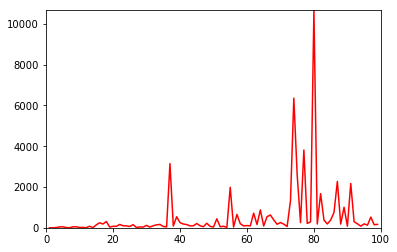

In [99]:
import numpy as np

def batch_perceptron(x, y):
    w = np.array([0, 0, 0])
    t = 0
    while True:
        is_modified = False
        for i in xrange(0, len(x)):
            if np.dot(w, x[i])* y[i] <= 0:
                w = w + np.array(x[i]) * y[i]
                is_modified = True
        if not is_modified:
            return w, min(np.dot(x, w) * y), t
        t += 1

t = []
indexes = []
k = 100
for i in xrange(1, k):
    t_k = []
    attempts_count = 5
    for attempts in xrange(1, attempts_count):
        x, y = points_generator((-10, 1, -10, 1), i, i)

        one = np.ones((len(x), 3))
        one[:, :-1] = x
    
        w, v, ti = batch_perceptron(one, y)
        t_k.append(ti)
    t.append(sum(t_k) / float(attempts_count - 1))
    indexes.append(i)
    
plt.cla()
plt.plot(indexes, t, 'r')
plt.axis([0, k, 0, max(t) + 1])
plt.show()

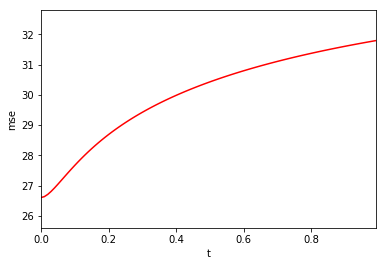

In [95]:
import numpy as np
import decimal

def parse_csv():
    x = []
    y = []
    with open('basketball.csv', 'r') as f:
        f.readline()
        for line in f:
            x1, x2, x3, x4, y0 = line.split(',')
            x.append([x1, x2, x3, x4])
            y.append([y0])
            
    return np.array(x).astype(float), np.array(y).astype(float)

x, y = parse_csv()

A = np.dot(np.transpose(x), x)
b = np.dot(np.transpose(x), y) 

mse = []
t = []
t_i = 0
while t_i < 1:
    w = np.dot(np.linalg.inv(A + t_i * np.identity(x.shape[1])), b)
    mse.append(((np.dot(x, w) - y) ** 2).mean())
    t.append(t_i)
    t_i += 0.01;

plt.cla()
plt.xlabel('t')
plt.ylabel('mse')
plt.plot(t, mse, 'r')
plt.axis([0, t[-1], min(mse) - 1, max(mse) + 1])
plt.show()        

In [105]:
import numpy as np
from scipy.optimize import linprog

x, y = parse_csv()

print x.shape, y.shape
c =  [0] * x.shape[1] + [1] * x.shape[0]
I = -np.identity(x.shape[0])
A = np.concatenate((np.concatenate((x, I), axis=1), np.concatenate((-x, I), axis=1)))
b = np.concatenate((y, -y))
bounds = [(None,None)] * x.shape[1] + [(0.0,None)] * x.shape[0]
res = linprog(c, A_ub=A, b_ub=b, bounds=bounds, options={"disp": True, "bland": True, "tol": 0.001})
w = res.x[:x.shape[1]]
print w

mse = ((np.dot(x, w) - y) ** 2).mean()
print mse

(54L, 4L) (54L, 1L)
Optimization terminated successfully.
         Current function value: 208.953912  
         Iterations: 138
[ -2.83245223e+00   1.05564300e-02   3.07481879e+01   1.76187408e+01]
42.1859935947
